In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-01-01T17:00:00,6,Friuli Venezia Giulia,647,63,710,11043,11753,-45,715,...,27.0,7071.0,1798.0,-48.0,8.87,6.04,10.11,39.77,1.61,-0.38
312,2021-01-02T17:00:00,6,Friuli Venezia Giulia,652,63,715,11132,11847,94,359,...,18.0,2657.0,776.0,89.0,8.81,6.04,13.51,46.26,0.00,0.80
313,2021-01-03T17:00:00,6,Friuli Venezia Giulia,658,61,719,10930,11649,-198,200,...,20.0,2211.0,659.0,-202.0,8.48,6.17,9.05,30.35,-3.17,-1.67
314,2021-01-04T17:00:00,6,Friuli Venezia Giulia,663,63,726,10967,11693,44,281,...,24.0,2438.0,723.0,37.0,8.68,6.21,11.53,38.87,3.28,0.38


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 5, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 688
Nuovi tamponi: 7105.0
Percentuale nuovi positivi/nuovi tamponi: 9.700000000000001 %
Nuovi guariti: 546.0
Nuovi deceduti: 41.0
Variazione positivi ricoverati con sintomi: -6.0
Variazione positivi in terapia intensiva: -4.0
Variazione positivi in isolamento dimiciliare: 111.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 5, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-06T17:00:00,6,Friuli Venezia Giulia,260,44,304,6451,6755,376,542,...,12.0,6552.0,1734.0,384.0,14.47,4.50,8.27,31.26,0.00,5.89
1,2020-11-07T17:00:00,6,Friuli Venezia Giulia,286,45,331,7029,7360,605,872,...,7.0,8692.0,2756.0,578.0,13.60,4.50,10.03,31.64,2.27,8.96
2,2020-11-08T17:00:00,6,Friuli Venezia Giulia,301,45,346,7295,7641,281,504,...,9.0,4486.0,1509.0,266.0,13.01,4.53,11.23,33.40,0.00,3.82
3,2020-11-09T17:00:00,6,Friuli Venezia Giulia,319,46,365,7467,7832,191,320,...,5.0,2324.0,955.0,172.0,12.60,4.66,13.77,33.51,2.22,2.50
4,2020-11-10T17:00:00,6,Friuli Venezia Giulia,336,47,383,7458,7841,9,482,...,20.0,6438.0,1775.0,-9.0,12.27,4.88,7.49,27.15,2.17,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-01T17:00:00,6,Friuli Venezia Giulia,647,63,710,11043,11753,-45,715,...,27.0,7071.0,1798.0,-48.0,8.87,6.04,10.11,39.77,1.61,-0.38
57,2021-01-02T17:00:00,6,Friuli Venezia Giulia,652,63,715,11132,11847,94,359,...,18.0,2657.0,776.0,89.0,8.81,6.04,13.51,46.26,0.00,0.80
58,2021-01-03T17:00:00,6,Friuli Venezia Giulia,658,61,719,10930,11649,-198,200,...,20.0,2211.0,659.0,-202.0,8.48,6.17,9.05,30.35,-3.17,-1.67
59,2021-01-04T17:00:00,6,Friuli Venezia Giulia,663,63,726,10967,11693,44,281,...,24.0,2438.0,723.0,37.0,8.68,6.21,11.53,38.87,3.28,0.38


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

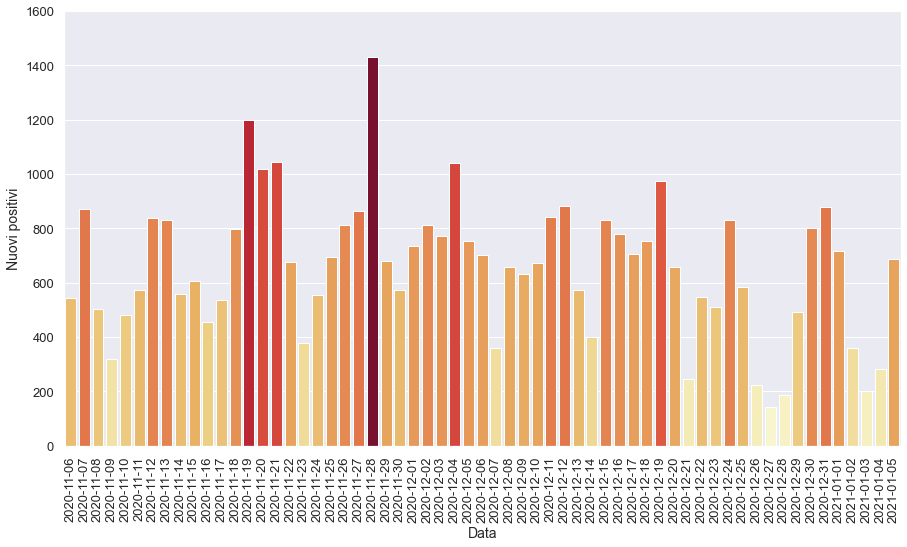

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

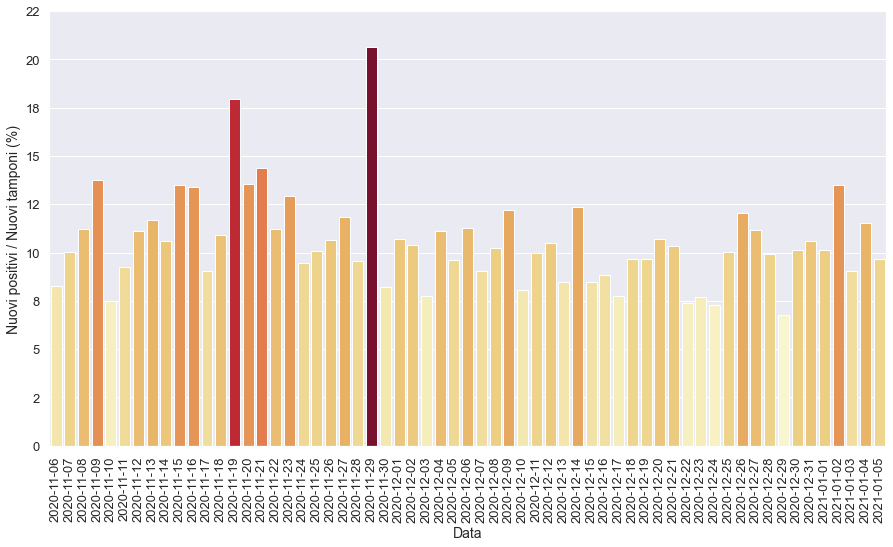

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

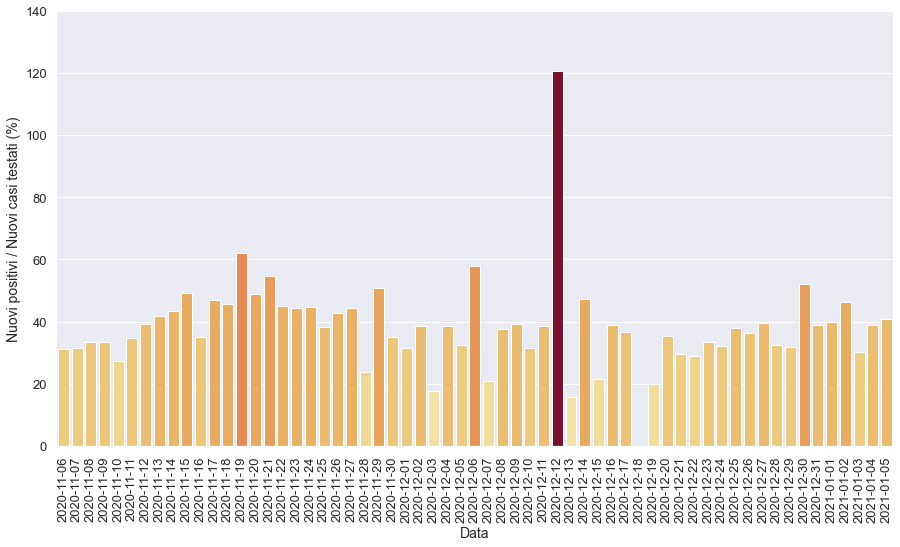

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

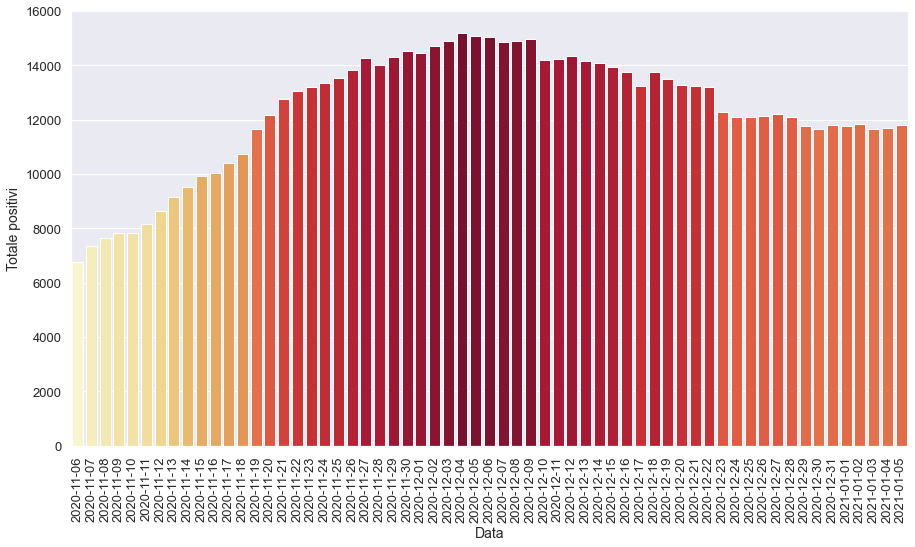

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

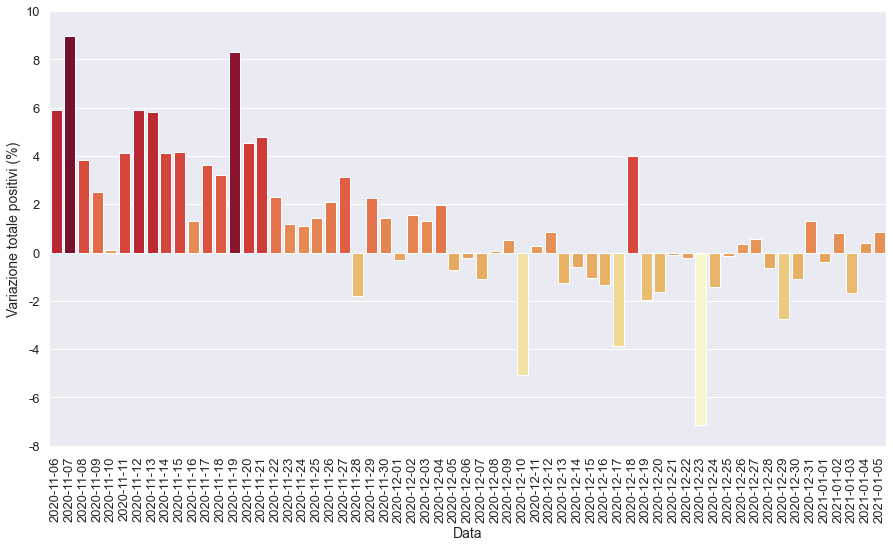

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

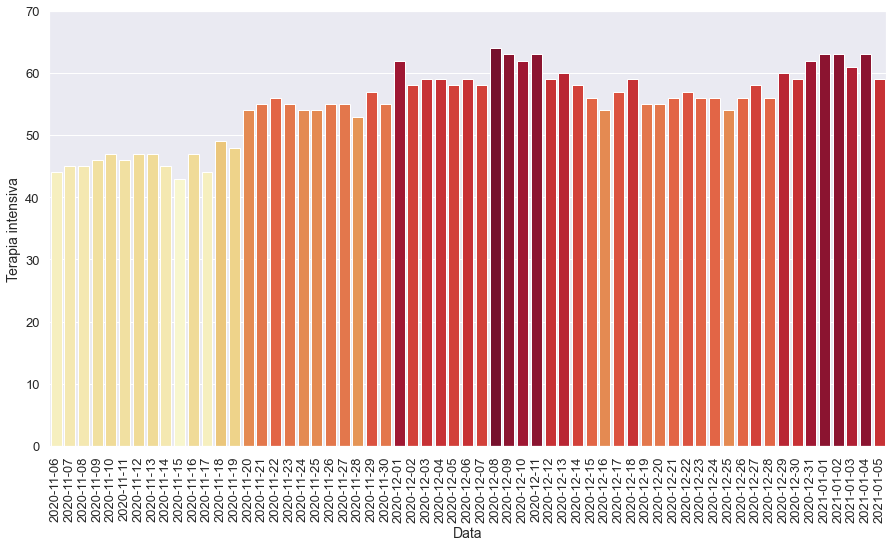

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

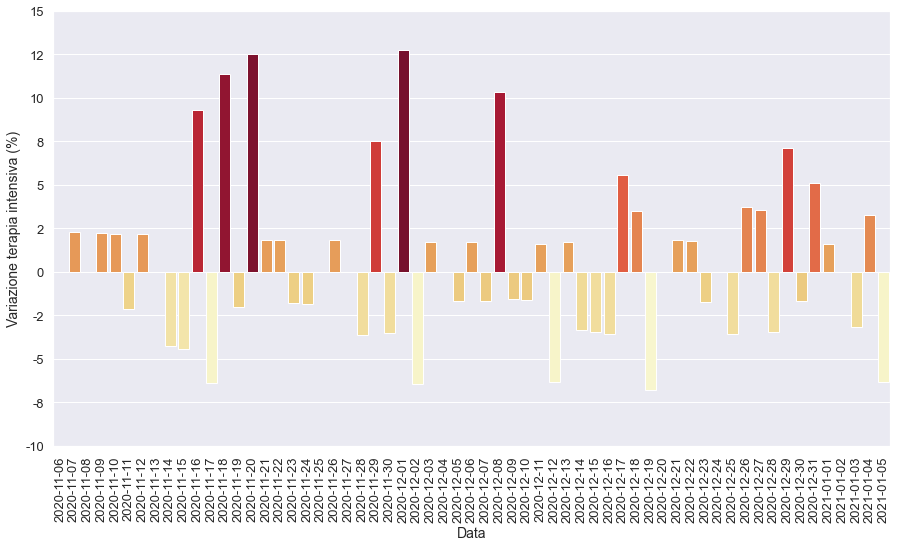

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

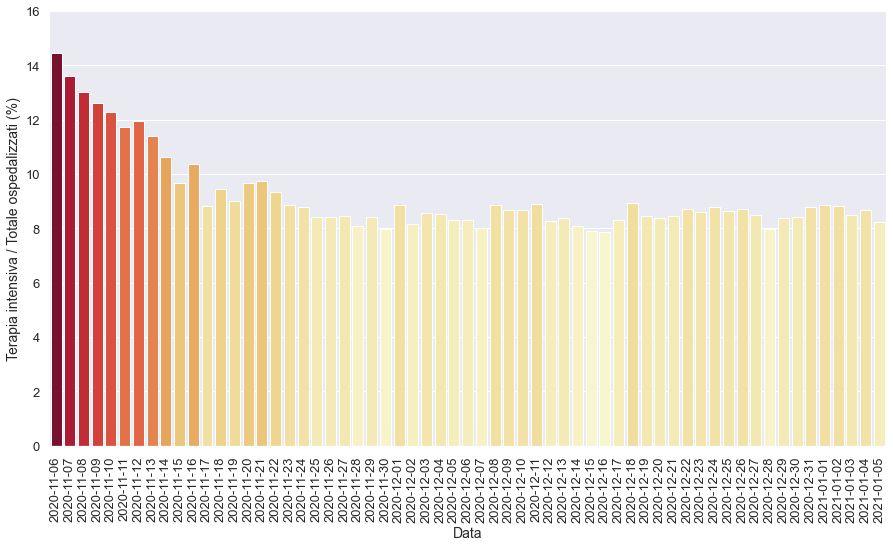

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

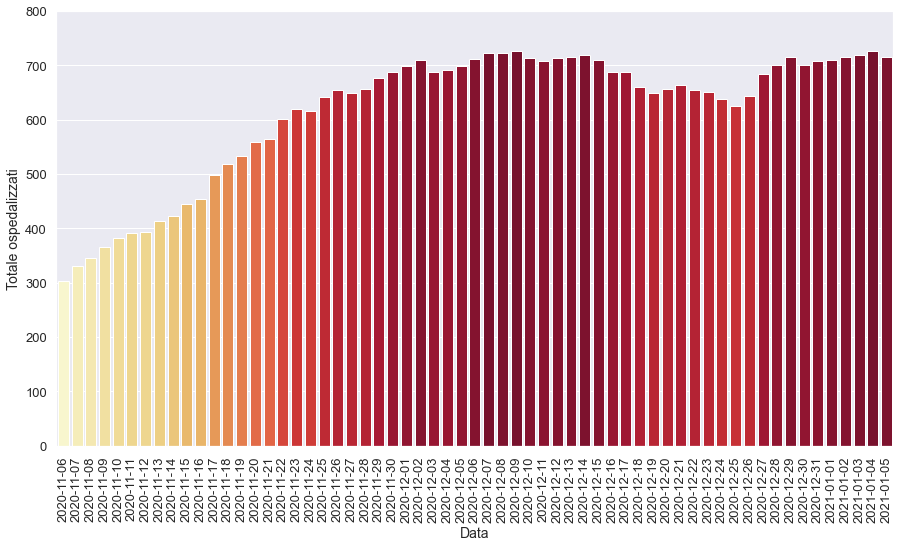

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

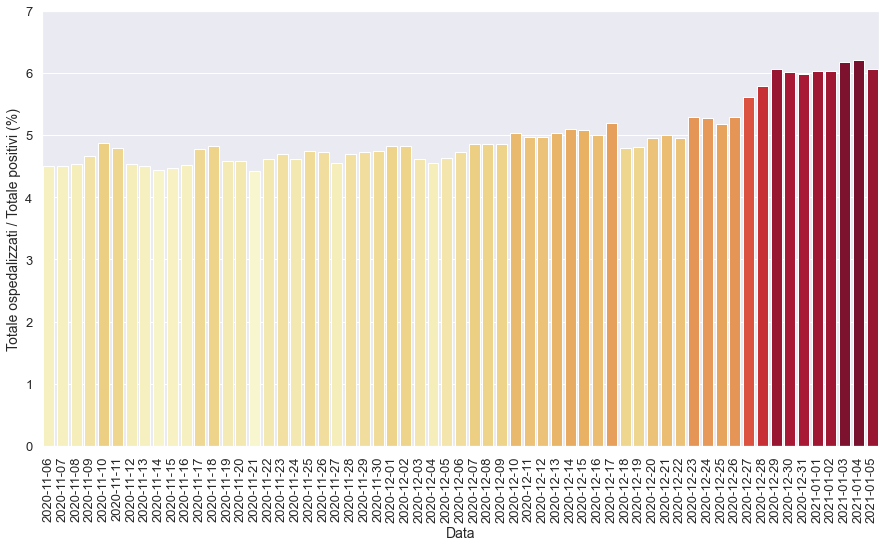

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

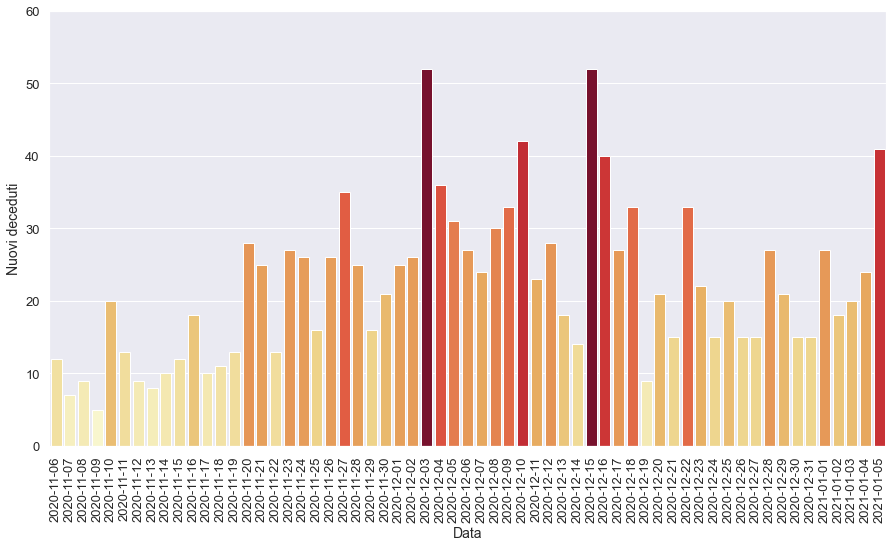

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

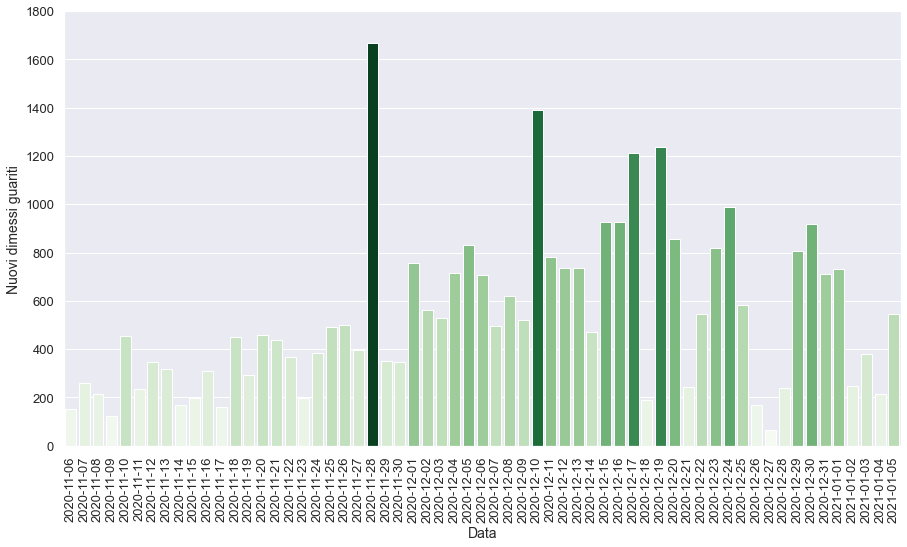

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,6,Friuli Venezia Giulia,652,59,711,14320,15031,-33,702,...,27.0,6227.0,1216.0,-46.0,8.30,4.73,11.27,57.73,1.72,-0.22
1,2020-12-07T17:00:00,6,Friuli Venezia Giulia,665,58,723,14146,14869,-162,359,...,24.0,3981.0,1720.0,-174.0,8.02,4.86,9.02,20.87,-1.69,-1.08
2,2020-12-08T17:00:00,6,Friuli Venezia Giulia,658,64,722,14155,14877,8,658,...,30.0,6427.0,1751.0,9.0,8.86,4.85,10.24,37.58,10.34,0.05
3,2020-12-09T17:00:00,6,Friuli Venezia Giulia,663,63,726,14229,14955,78,633,...,33.0,5190.0,1609.0,74.0,8.68,4.85,12.20,39.34,-1.56,0.52
4,2020-12-10T17:00:00,6,Friuli Venezia Giulia,652,62,714,13481,14195,-760,672,...,42.0,8356.0,2136.0,-748.0,8.68,5.03,8.04,31.46,-1.59,-5.08
5,2020-12-11T17:00:00,6,Friuli Venezia Giulia,644,63,707,13528,14235,40,843,...,23.0,8432.0,2182.0,47.0,8.91,4.97,10.00,38.63,1.61,0.28
6,2020-12-12T17:00:00,6,Friuli Venezia Giulia,654,59,713,13642,14355,120,884,...,28.0,8444.0,732.0,114.0,8.27,4.97,10.47,120.77,-6.35,0.84
7,2020-12-13T17:00:00,6,Friuli Venezia Giulia,655,60,715,13458,14173,-182,573,...,18.0,6785.0,3618.0,-184.0,8.39,5.04,8.45,15.84,1.69,-1.27
8,2020-12-14T17:00:00,6,Friuli Venezia Giulia,660,58,718,13370,14088,-85,402,...,14.0,3253.0,849.0,-88.0,8.08,5.10,12.36,47.35,-3.33,-0.60
9,2020-12-15T17:00:00,6,Friuli Venezia Giulia,654,56,710,13229,13939,-149,829,...,52.0,9766.0,3845.0,-141.0,7.89,5.09,8.49,21.56,-3.45,-1.06


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

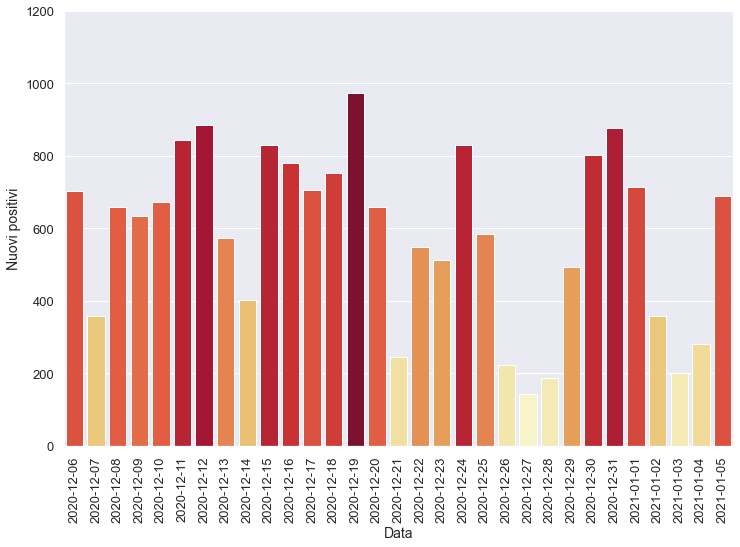

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

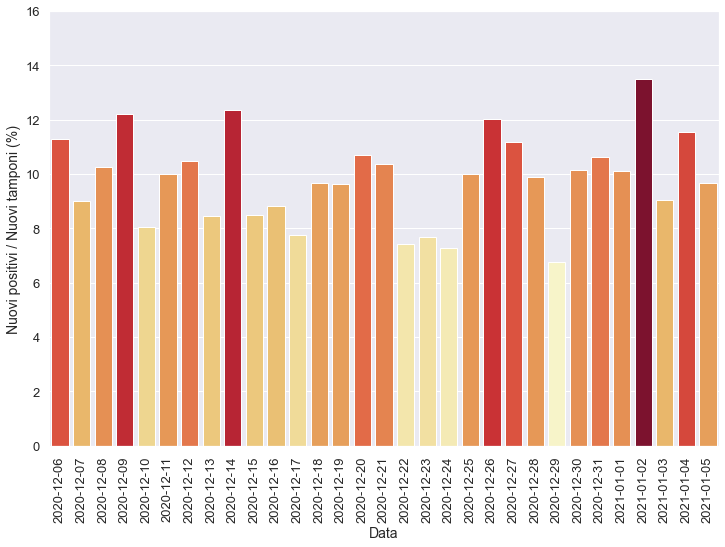

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

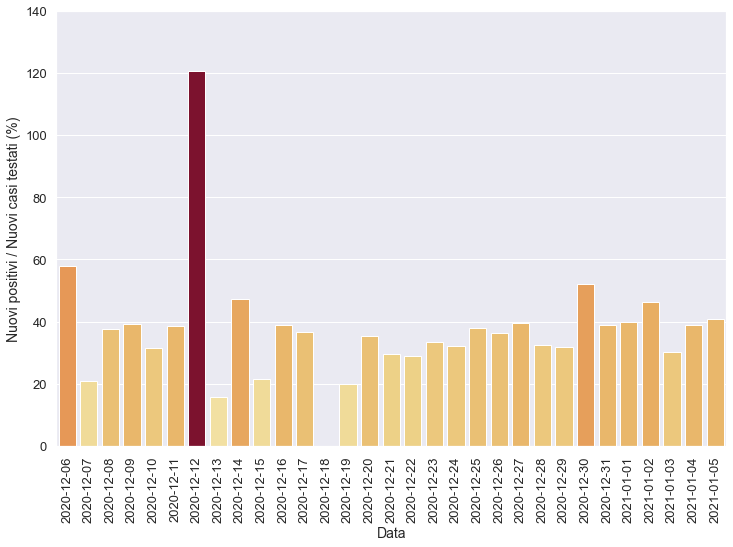

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

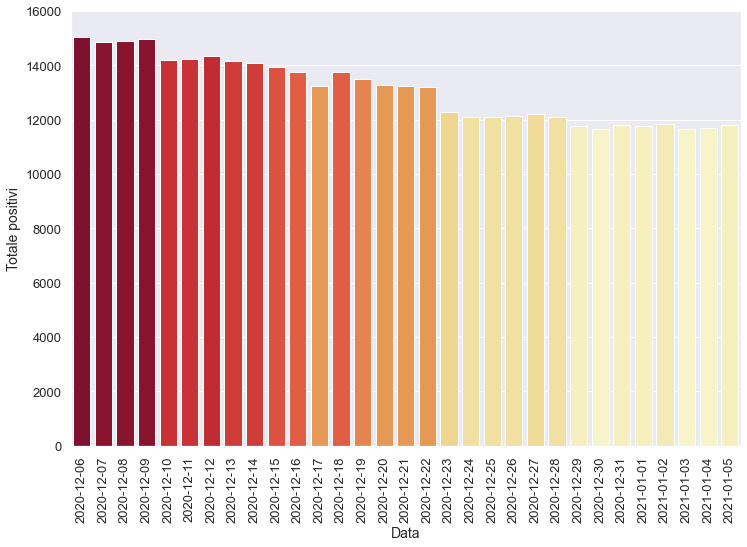

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

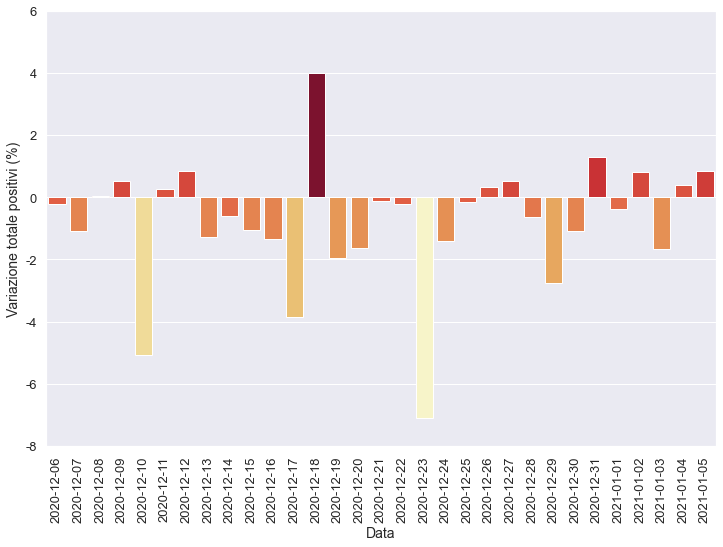

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

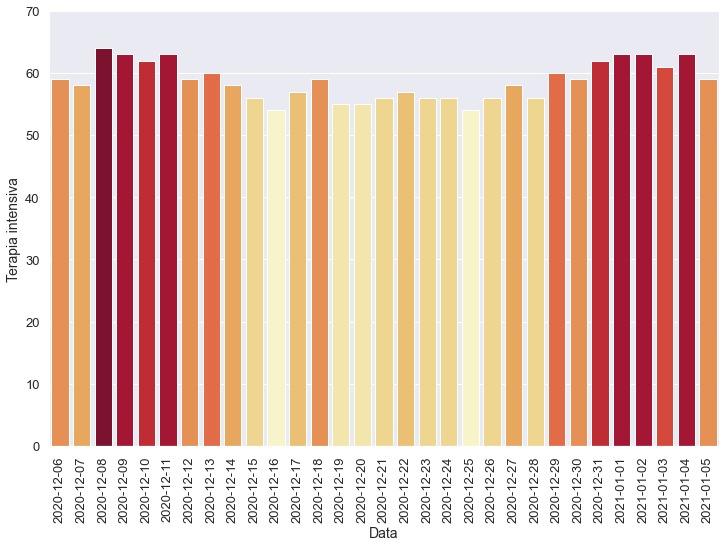

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

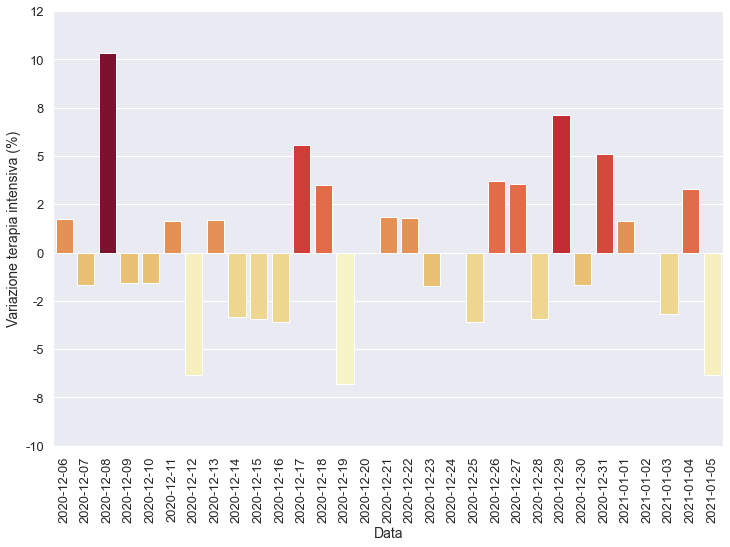

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

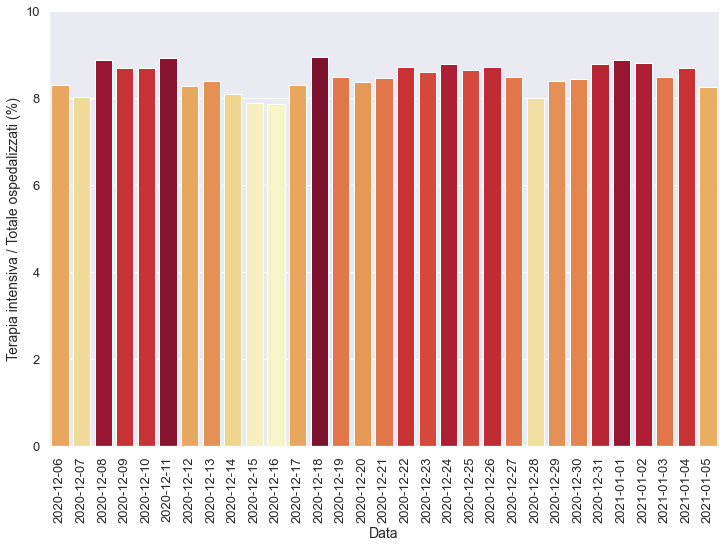

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

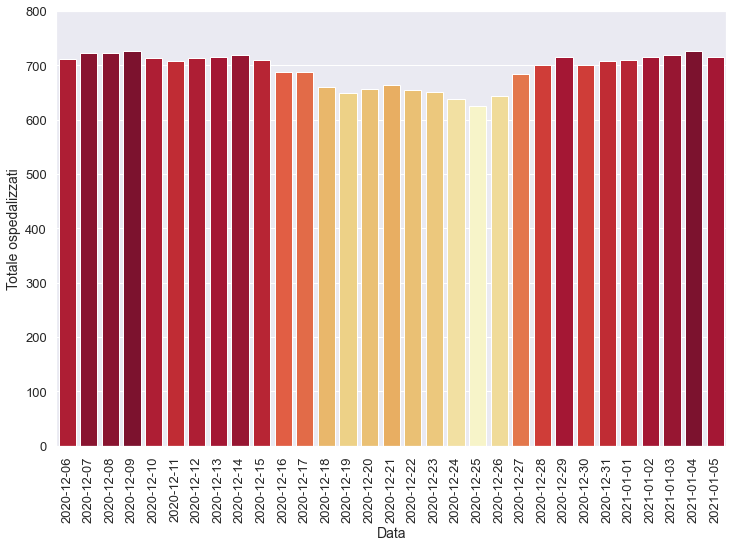

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

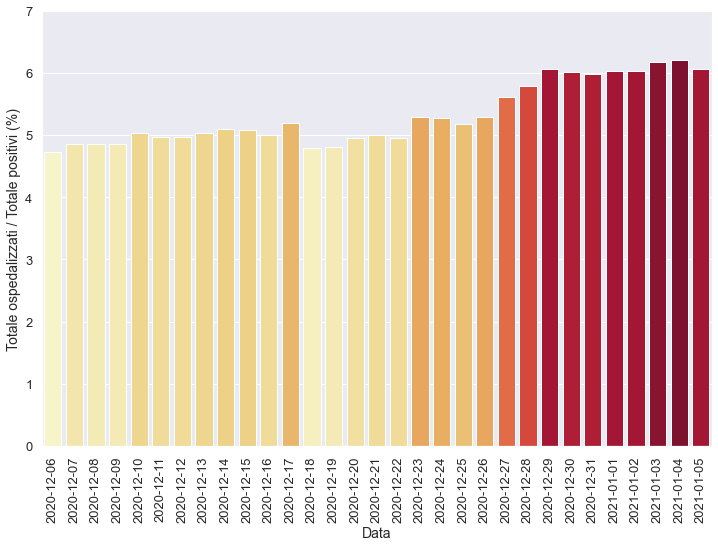

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

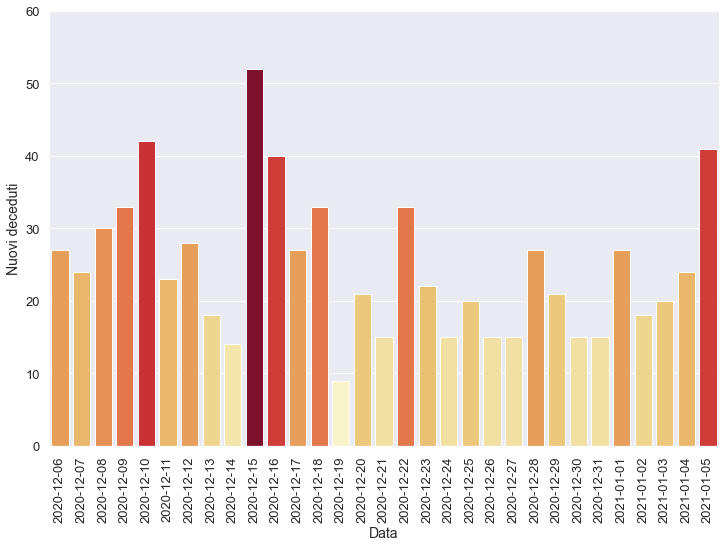

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

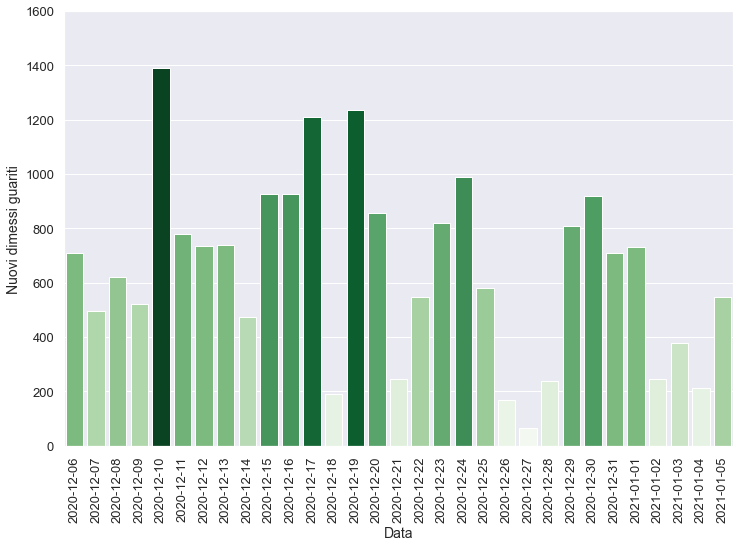

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-29T17:00:00,6,Friuli Venezia Giulia,655,60,715,11062,11777,-335,493,...,21.0,7301.0,1554.0,-349.0,8.39,6.07,6.75,31.72,7.14,-2.77
1,2020-12-30T17:00:00,6,Friuli Venezia Giulia,641,59,700,10947,11647,-130,803,...,15.0,7930.0,1540.0,-115.0,8.43,6.01,10.13,52.14,-1.67,-1.10
2,2020-12-31T17:00:00,6,Friuli Venezia Giulia,645,62,707,11091,11798,151,877,...,15.0,8263.0,2248.0,144.0,8.77,5.99,10.61,39.01,5.08,1.30
3,2021-01-01T17:00:00,6,Friuli Venezia Giulia,647,63,710,11043,11753,-45,715,...,27.0,7071.0,1798.0,-48.0,8.87,6.04,10.11,39.77,1.61,-0.38
4,2021-01-02T17:00:00,6,Friuli Venezia Giulia,652,63,715,11132,11847,94,359,...,18.0,2657.0,776.0,89.0,8.81,6.04,13.51,46.26,0.00,0.80
5,2021-01-03T17:00:00,6,Friuli Venezia Giulia,658,61,719,10930,11649,-198,200,...,20.0,2211.0,659.0,-202.0,8.48,6.17,9.05,30.35,-3.17,-1.67
6,2021-01-04T17:00:00,6,Friuli Venezia Giulia,663,63,726,10967,11693,44,281,...,24.0,2438.0,723.0,37.0,8.68,6.21,11.53,38.87,3.28,0.38
7,2021-01-05T17:00:00,6,Friuli Venezia Giulia,657,59,716,11078,11794,101,688,...,41.0,7105.0,1680.0,111.0,8.24,6.07,9.68,40.95,-6.35,0.86


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

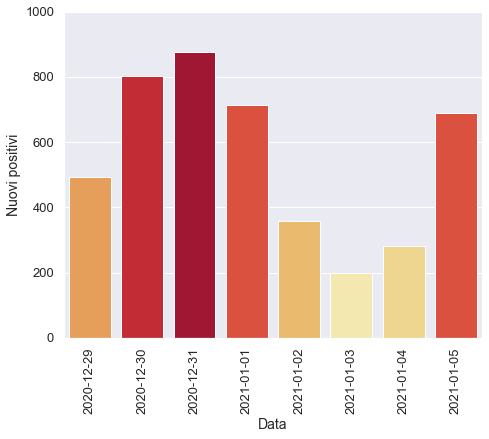

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

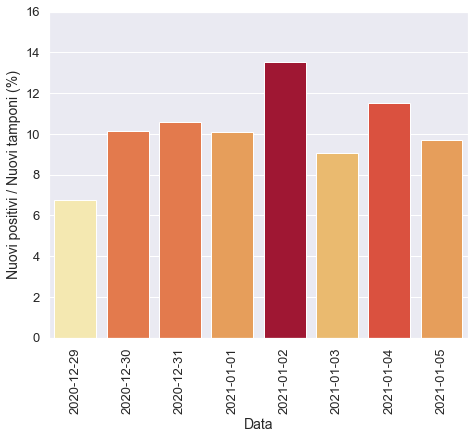

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

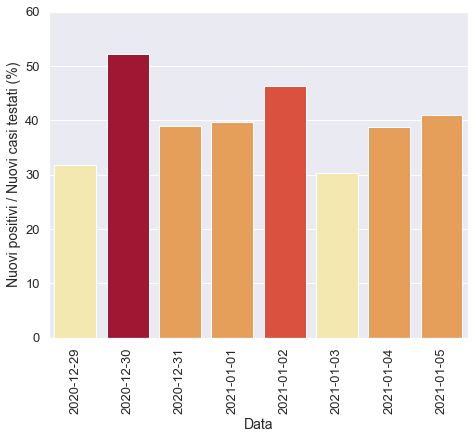

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

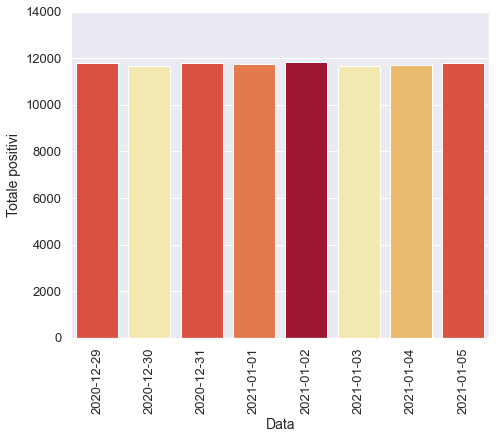

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

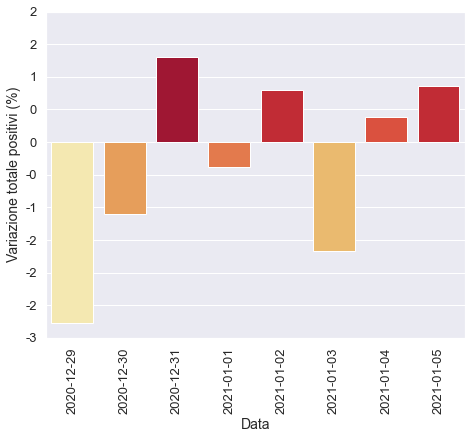

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

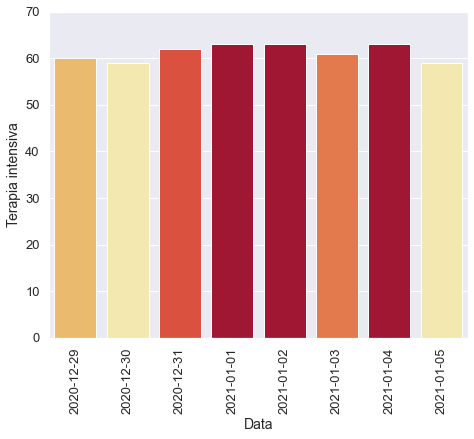

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

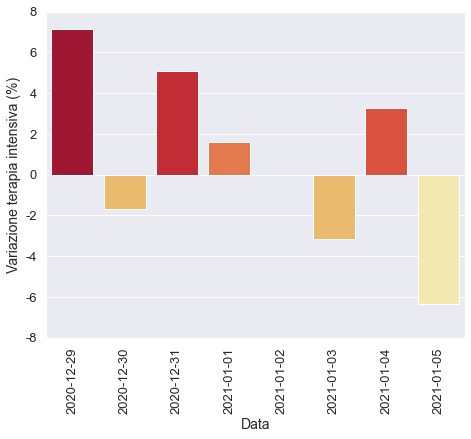

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

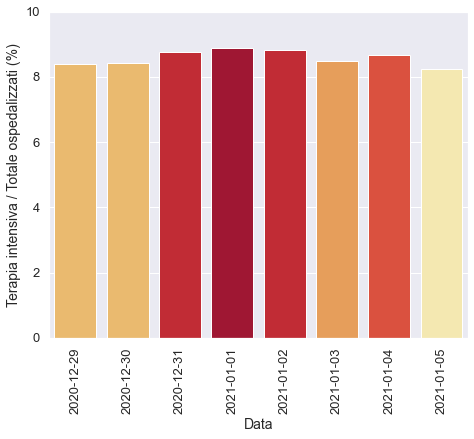

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

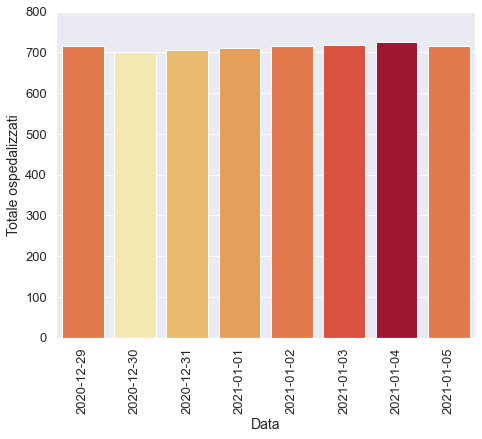

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

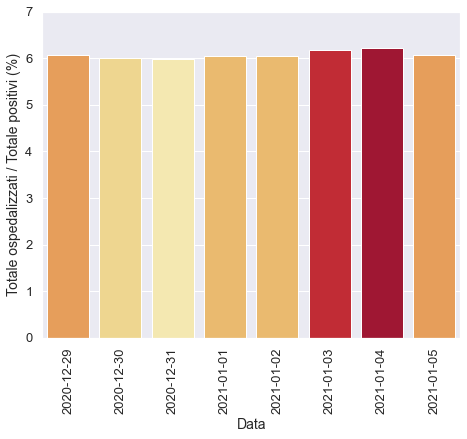

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

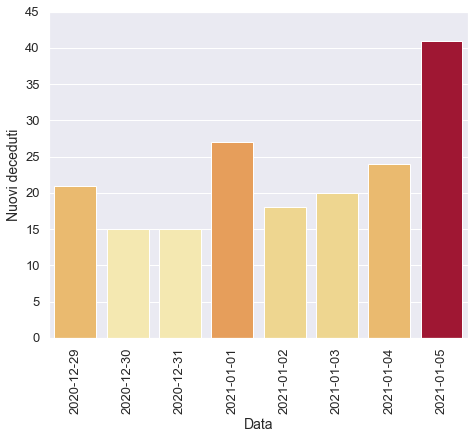

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

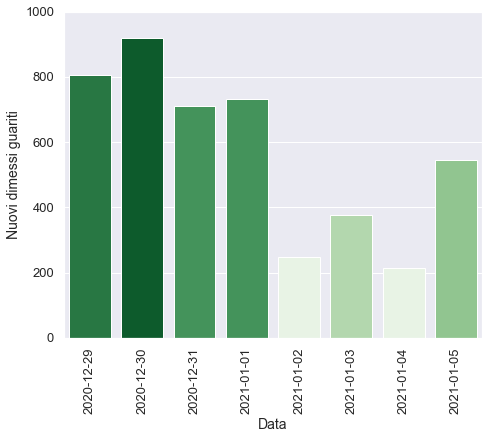

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)